# Is College Worth it?
> Johann Magbitang
<br>
> CSX 450.1
<br>
> September 2, 2022

- toc: true
- branch: master
- badges: true
- comments: true
- author: Johann Magbitang
- categories: [fastpages, jupyter]

## Introduction

In thinking about a topic for this project, one that had come to mind was college and college graduates. For many people, college is a very big deal and is necessary for one to succeed in their particular career. However, many also contemplate the costs that college could bring, especially the heavy payments that many schools require. It also doesn't help when many parents engrave the pressure of getting a degree at such young ages. This all goes through the minds of many people in deciding whether or not college is for them. College graduates also have a similar problem. Having just finished their last final, these graduates are pushed into the real world where, the job market is very competitive, and with many students with no job offers right away it could bring up thoughts such as, "was the last four years worth it?". Being a recent college graduate, these have been some thoughts that have gone through my head, which sparked my interest in researching this topic. One thing that many think about in careers is what the pay is like. That is the going to be the foundation of this research, looking at all the factos that go into salaries. Where is the best region for different job types? What are the degrees that are the most lucrative? Does the college name matter when it ultimately comes to the salary? These are just some question to analyze within this topic and ultimately leads to the big question.

### The BIG Question

What is the main point that this analysis will answer. Well ultimately, I want the audience of those contemplating college and college graduates to understand the different fields that they can go to and the benefits that college can bring as foundation for a successful career. In other words, is the pay after finishing college worth the costs to get in?

## The DATA

The three datasets that are being analyzed are all datasets that provide information on salaries. They are split into salaries by college type, by degrees, and by region. These datasets are gathered from kaggle, specifically from https://www.kaggle.com/datasets/wsj/college-salaries. Each dataset will look at the starting median salary. This is the average salary for each specific field as the person enters that career. It will also look at the mid-career median salary, which is the salary of someone that has been in a field of work for about 5 to 10 years. And this is also split into another four variables that looks at the different percentiles and salaries in each perspective group. The first dataset looks at salaries by college type. It is a collection of 269 colleges that range from schools like MIT and Black Hills State University. These colleges are placed into 5 groups that are categorized as Engineering, State, Ivy League, Party, and Liberal Arts schools. The second data set involves different majors and the same variables that measure the salaries for each. This dataset also has a new variable of percent change, where it measures the percent change, usually increase, from starting salaries to mid-career. Lastly, the last dataset is also a dataset of various schools and are broken into regions instead of school types. The regions consist of California, Western, Midwestern, Northeastern, and Southern regions. All of these datasets are used to measure the starting salaries but also see the increase in different fields and really illustrate the most lucrative fields. 

In [1]:
## importing different python libraries
import sklearn.cluster
import sklearn.linear_model
import sklearn.model_selection

import matplotlib.pyplot as plt
import numpy as np
import ipywidgets
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('salaries-by-college-type.csv')
df2 = pd.read_csv('degrees-that-pay-back.csv')
df3 = pd.read_csv('salaries-by-region.csv')

In [3]:
df.head()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN


In [4]:
df["School Type"].value_counts()

State           175
Liberal Arts     47
Party            20
Engineering      19
Ivy League        8
Name: School Type, dtype: int64

In [5]:
df2.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


In [6]:
df3.head()

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,"$70,400.00","$129,000.00","$68,400.00","$93,100.00","$184,000.00","$257,000.00"
1,California Institute of Technology (CIT),California,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,California,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"University of California, Berkeley",California,"$59,900.00","$112,000.00","$59,500.00","$81,000.00","$149,000.00","$201,000.00"
4,Occidental College,California,"$51,900.00","$105,000.00",NaN,"$54,800.00","$157,000.00",NaN


In [7]:
df3['Region'].value_counts()

Northeastern    100
Southern         79
Midwestern       71
Western          42
California       28
Name: Region, dtype: int64

#### Data Cleaning

When it comes to the data cleaning portion for the dataset, all of the datasets were input with dollar values where the dollar sign had made the values into strings. So to fix this, the columns with numericals with dollar signs have to converted to numerical values. The code below takes those strings with the dollar sign and removes the dollar sign then converts the rest of the string to a numeric. This had to be done to all three datasets. Another thing that needed to be addressed were the NaN values. During the analysis, these values would disrupt the calculations and plotting of points, so all the NaNs were dropped. This only appeared in the first dataframe and the third data frame. For the first data frame, 38 rows were dropped leaving the data frame with the dimensions of 231 rows by 8 columns. And for the third dataset, dropping the NaNs left the dimensions to be 273 rows by 9 columns. It had dropped 47 rows. In both datasets, 14 percent of the data was removed, which is not too much as it still leaves over 80 percent of the data to be analyzed. After doing these dasks the datasets were ready to be analyzed.

In [8]:
## The dollar signs show the numbers as strings, so this will convert the strings to numericals
dfcol = ['Starting Median Salary','Mid-Career Median Salary','Mid-Career 10th Percentile Salary','Mid-Career 25th Percentile Salary','Mid-Career 75th Percentile Salary','Mid-Career 90th Percentile Salary']

for x in dfcol:
    df[x] = df[x].str.replace("$","")
    df[x] = df[x].str.replace(",","")
    df[x] = pd.to_numeric(df[x])
df.head()

C:\Users\Patrick Magbitang\AppData\Local\Temp\ipykernel_9888\2536284012.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[x] = df[x].str.replace("$","")


,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,72200.0,126000.0,76800.0,99200.0,168000.0,220000.0
1,California Institute of Technology (CIT),Engineering,75500.0,123000.0,NaN,104000.0,161000.0,NaN
2,Harvey Mudd College,Engineering,71800.0,122000.0,NaN,96000.0,180000.0,NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,62400.0,114000.0,66800.0,94300.0,143000.0,190000.0
4,Cooper Union,Engineering,62200.0,114000.0,NaN,80200.0,142000.0,NaN


In [9]:
## This will do the same as above to df2 
df2col = ['Starting Median Salary','Mid-Career Median Salary','Mid-Career 10th Percentile Salary',
          'Mid-Career 25th Percentile Salary','Mid-Career 75th Percentile Salary','Mid-Career 90th Percentile Salary']

for x in df2col:
    df2[x] = df2[x].str.replace("$","")
    df2[x] = df2[x].str.replace(",","")
    df2[x] = pd.to_numeric(df2[x])
df2.head()

C:\Users\Patrick Magbitang\AppData\Local\Temp\ipykernel_9888\3148104007.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2[x] = df2[x].str.replace("$","")


,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,46000.0,77100.0,67.6,42200.0,56100.0,108000.0,152000.0
1,Aerospace Engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0
2,Agriculture,42600.0,71900.0,68.8,36300.0,52100.0,96300.0,150000.0
3,Anthropology,36800.0,61500.0,67.1,33800.0,45500.0,89300.0,138000.0
4,Architecture,41600.0,76800.0,84.6,50600.0,62200.0,97000.0,136000.0


In [10]:
## Doing the same string to numeric for df3
df3col = ['Starting Median Salary','Mid-Career Median Salary','Mid-Career 10th Percentile Salary','Mid-Career 25th Percentile Salary','Mid-Career 75th Percentile Salary',
          'Mid-Career 90th Percentile Salary']

for x in df3col:
    df3[x] = df3[x].str.replace("$","")
    df3[x] = df3[x].str.replace(",","")
    df3[x] = pd.to_numeric(df3[x])
df3.head()

C:\Users\Patrick Magbitang\AppData\Local\Temp\ipykernel_9888\4207690454.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df3[x] = df3[x].str.replace("$","")


,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,70400.0,129000.0,68400.0,93100.0,184000.0,257000.0
1,California Institute of Technology (CIT),California,75500.0,123000.0,NaN,104000.0,161000.0,NaN
2,Harvey Mudd College,California,71800.0,122000.0,NaN,96000.0,180000.0,NaN
3,"University of California, Berkeley",California,59900.0,112000.0,59500.0,81000.0,149000.0,201000.0
4,Occidental College,California,51900.0,105000.0,NaN,54800.0,157000.0,NaN


In [11]:
df.describe()

,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
count,269.000000,269.000000,231.000000,269.000000,269.000000,231.000000
mean,46068.401487,83932.342007,44250.649351,60373.234201,116275.092937,157705.627706
std,6412.616242,14336.191107,8719.612427,11381.348857,22952.334054,34823.348157
min,34800.000000,43900.000000,22600.000000,31800.000000,60900.000000,87600.000000
25%,42000.000000,74000.000000,39000.000000,53200.000000,100000.000000,136000.000000
50%,44700.000000,81600.000000,43100.000000,58400.000000,113000.000000,153000.000000
75%,48300.000000,92200.000000,47400.000000,65100.000000,126000.000000,170500.000000
max,75500.000000,134000.000000,80000.000000,104000.000000,234000.000000,326000.000000


In [12]:
## Droping the NA values in the dataset. Only 38 rows are to be dropped and this would only be 14% of the dataset, so majority of the dataset is still available.
df.dropna()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,72200.0,126000.0,76800.0,99200.0,168000.0,220000.0
3,"Polytechnic University of New York, Brooklyn",Engineering,62400.0,114000.0,66800.0,94300.0,143000.0,190000.0
5,Worcester Polytechnic Institute (WPI),Engineering,61000.0,114000.0,80000.0,91200.0,137000.0,180000.0
6,Carnegie Mellon University (CMU),Engineering,61800.0,111000.0,63300.0,80100.0,150000.0,209000.0
7,Rensselaer Polytechnic Institute (RPI),Engineering,61100.0,110000.0,71600.0,85500.0,140000.0,182000.0
...,...,...,...,...,...,...,...,...
264,Austin Peay State University,State,37700.0,59200.0,32200.0,40500.0,73900.0,96200.0
265,Pittsburg State University,State,40400.0,58200.0,25600.0,46000.0,84600.0,117000.0
266,Southern Utah University,State,41900.0,56500.0,30700.0,39700.0,78400.0,116000.0
267,Montana State University - Billings,State,37900.0,50600.0,22600.0,31800.0,78500.0,98900.0


In [13]:
df3.describe()

,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
count,320.000000,320.000000,273.000000,320.000000,320.000000,273.000000
mean,46253.437500,83934.375000,45253.113553,60614.062500,116496.875000,160442.124542
std,6617.038001,15191.443091,8562.834333,11786.436432,24104.265214,36785.768186
min,34500.000000,43900.000000,25600.000000,31800.000000,60900.000000,85700.000000
25%,42000.000000,73725.000000,39500.000000,53100.000000,99825.000000,136000.000000
50%,45100.000000,82700.000000,43700.000000,59400.000000,113000.000000,154000.000000
75%,48900.000000,93250.000000,48900.000000,66025.000000,129000.000000,178000.000000
max,75500.000000,134000.000000,80000.000000,104000.000000,234000.000000,326000.000000


In [14]:
## Also dropping the NA values in df3. This would drop 47 rows which again is only 14% of the data. 86% of the data is still left to be analyzed.
df3.dropna()

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,70400.0,129000.0,68400.0,93100.0,184000.0,257000.0
3,"University of California, Berkeley",California,59900.0,112000.0,59500.0,81000.0,149000.0,201000.0
5,Cal Poly San Luis Obispo,California,57200.0,101000.0,55000.0,74700.0,133000.0,178000.0
6,University of California at Los Angeles (UCLA),California,52600.0,101000.0,51300.0,72500.0,139000.0,193000.0
7,"University of California, San Diego (UCSD)",California,51100.0,101000.0,51700.0,75400.0,131000.0,177000.0
...,...,...,...,...,...,...,...,...
315,State University of New York (SUNY) at Potsdam,Northeastern,38000.0,70300.0,35100.0,51200.0,100000.0,179000.0
316,Niagara University,Northeastern,36900.0,69700.0,44000.0,57000.0,92000.0,128000.0
317,State University of New York (SUNY) at Fredonia,Northeastern,37800.0,66200.0,32800.0,44200.0,93300.0,181000.0
318,University of Southern Maine,Northeastern,39400.0,63600.0,40400.0,47900.0,85700.0,117000.0


## Exploratory Data Analysis

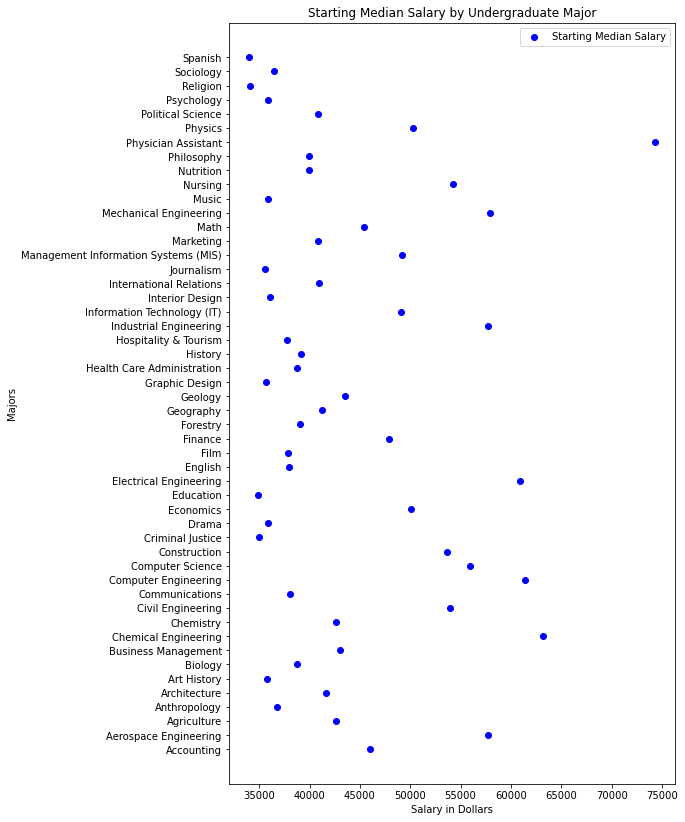

In [15]:
## This is a scatter plot of the starting salaries for different majors
fig = plt.figure(figsize=(8,14))

x = df2['Starting Median Salary']
y = df2.index
labels = df2['Undergraduate Major']

plt.scatter(x, y, color='blue', label = 'Starting Median Salary')
plt.yticks(y, labels)

plt.xlabel('Salary in Dollars')
plt.ylabel('Majors')
plt.title('Starting Median Salary by Undergraduate Major')
plt.legend(loc=1) 
plt.show()

After graphing the scatter plot of starting salaries for different majors, it is very confusing to look at as all the points are scattered and cannot really see clearly which majors are the best ones to chose. Therefore, the data must be sorted in order from either greatest salary to least or the other way around. 

In [16]:
## sorting the values based on starting median career salary
df2.sort_values(by = 'Starting Median Salary', ascending = True, inplace = True)
df2 = df2.reset_index()

df2.tail(15)

,index,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
35,31,Information Technology (IT),49100.0,74800.0,52.3,44500.0,56700.0,96700.0,129000.0
36,35,Management Information Systems (MIS),49200.0,82300.0,67.3,45300.0,60500.0,108000.0,146000.0
37,17,Economics,50100.0,98600.0,96.8,50600.0,70600.0,145000.0,210000.0
38,44,Physics,50300.0,97300.0,93.4,56000.0,74200.0,132000.0,178000.0
39,14,Construction,53700.0,88900.0,65.5,56300.0,68100.0,118000.0,171000.0
40,10,Civil Engineering,53900.0,90500.0,67.9,63400.0,75100.0,115000.0,148000.0
41,40,Nursing,54200.0,67000.0,23.6,47600.0,56400.0,80900.0,98300.0
42,13,Computer Science,55900.0,95500.0,70.8,56000.0,74900.0,122000.0,154000.0
43,30,Industrial Engineering,57700.0,94700.0,64.1,57100.0,72300.0,132000.0,173000.0
44,1,Aerospace Engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0


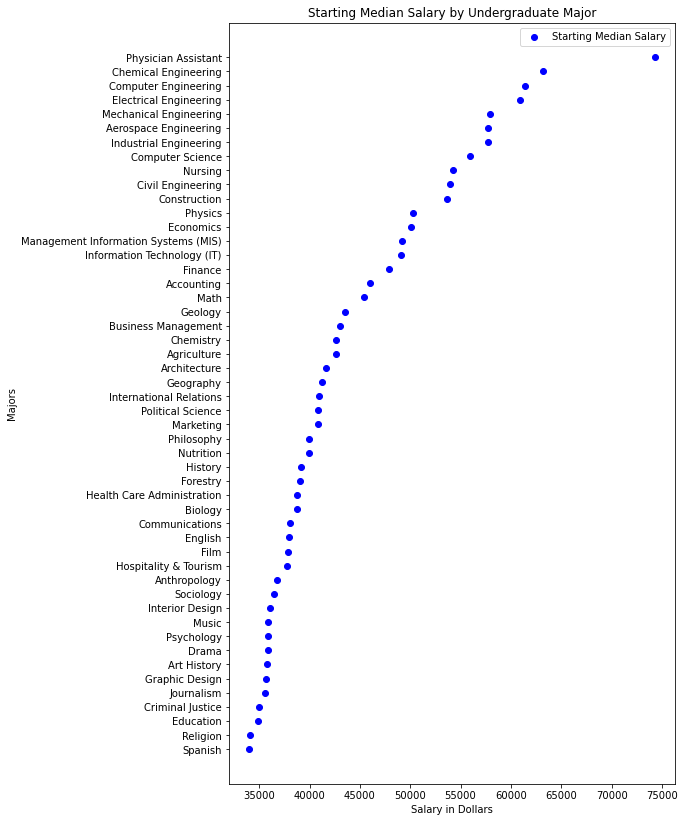

In [17]:
## Plotting the same graph to see the changes. The graph should be from least to greatest now.
fig = plt.figure(figsize=(8,14))

x = df2['Starting Median Salary']
y = df2.index
labels = df2['Undergraduate Major']

plt.scatter(x, y, color='blue', label = 'Starting Median Salary')
plt.yticks(y, labels)

plt.xlabel('Salary in Dollars')
plt.ylabel('Majors')
plt.title('Starting Median Salary by Undergraduate Major')
plt.legend(loc=1) 
plt.show()

From the plot now, it can be conclued that a major in spanish will most likely come with the lowest salary compared to a major of physical assistant. It is no suprise to see that all the engineering majors are amongst the top in starting salaries as those are usually the higher paying jobs in the market these days. It is suprising however, to see majors such as information technology and management information systems not as high as the engineering salaries as those jobs do pay as well as engineering jobs. This may be later down in a person's career where the pay increases. 

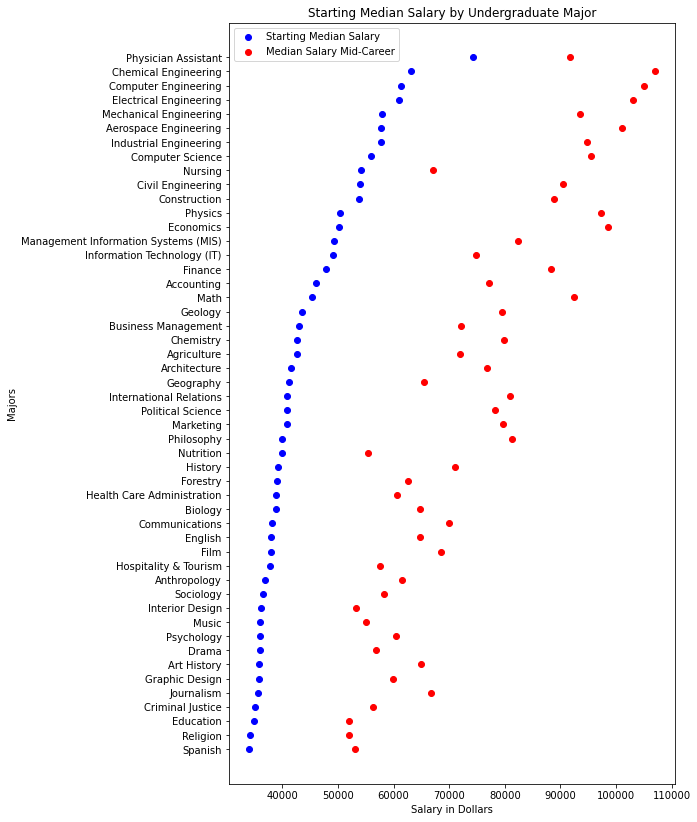

In [18]:
## Going to add the mid career values to the plot to compare the two and see if some majors increase over time in the career.
fig = plt.figure(figsize=(8,14))

x = df2['Starting Median Salary']
y = df2.index
labels = df2['Undergraduate Major']

plt.scatter(x, y, color='blue', label = 'Starting Median Salary')
plt.yticks(y, labels)

x2 = df2['Mid-Career Median Salary']
plt.scatter(x2, y, color = 'red', label = 'Median Salary Mid-Career')

plt.xlabel('Salary in Dollars')
plt.ylabel('Majors')
plt.title('Starting Median Salary by Undergraduate Major')
plt.legend(loc=2) 
plt.show()

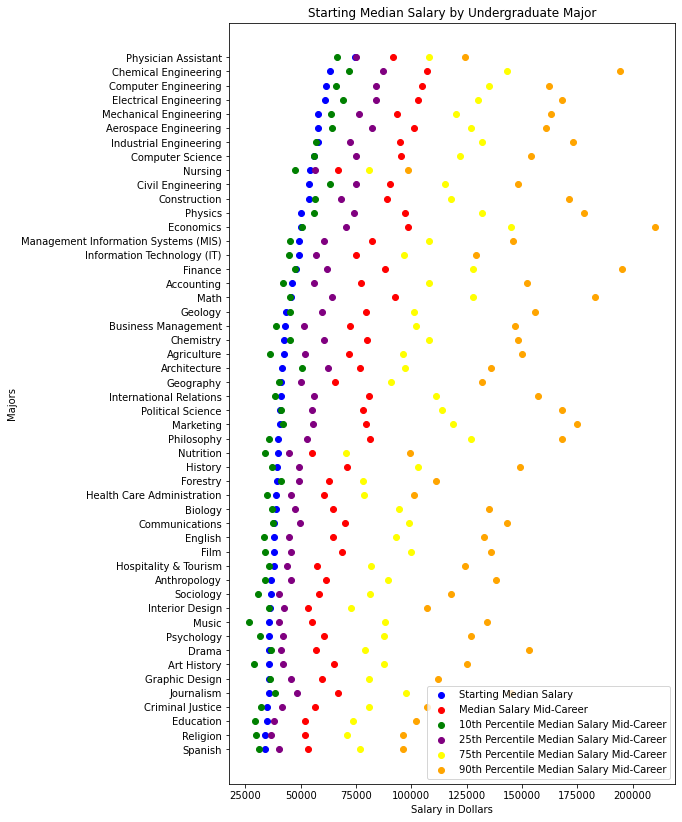

In [19]:
## This is now a plot that inlcudes all the variables up to the 90th percentile.
fig = plt.figure(figsize=(8,14))

x = df2['Starting Median Salary']
y = df2.index
labels = df2['Undergraduate Major']

plt.scatter(x, y, color='blue', label = 'Starting Median Salary')
plt.yticks(y, labels)

x2 = df2['Mid-Career Median Salary']
plt.scatter(x2, y, color = 'red', label = 'Median Salary Mid-Career')

x3 = df2['Mid-Career 10th Percentile Salary']
plt.scatter(x3, y, color = 'green', label = '10th Percentile Median Salary Mid-Career')

x4 = df2['Mid-Career 25th Percentile Salary']
plt.scatter(x4, y, color = 'purple', label = '25th Percentile Median Salary Mid-Career')

x5 = df2['Mid-Career 75th Percentile Salary']
plt.scatter(x5, y, color = 'yellow', label = '75th Percentile Median Salary Mid-Career')

x6 = df2['Mid-Career 90th Percentile Salary']
plt.scatter(x6, y, color = 'orange', label = '90th Percentile Median Salary Mid-Career')


plt.xlabel('Salary in Dollars')
plt.ylabel('Majors')
plt.title('Starting Median Salary by Undergraduate Major')
plt.legend(loc=4) 
plt.show()

[Text(0.5, 1.0, 'Starting Median Salary per Region')]

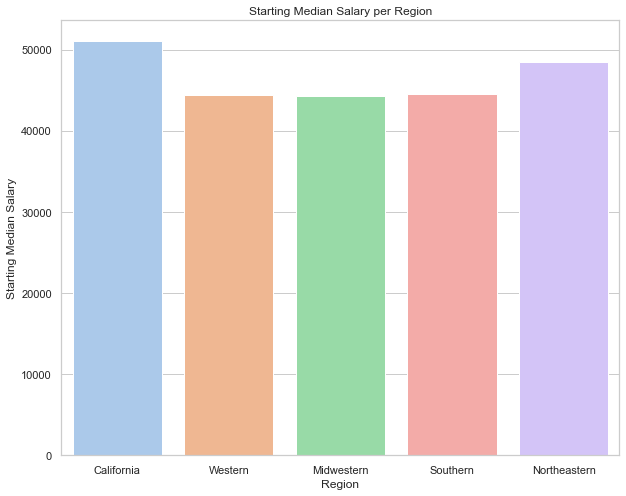

In [20]:
fig = plt.figure(figsize=(10,8))
sns.set_theme(style="whitegrid")
sns.barplot(x = "Region", y = "Starting Median Salary",
            palette="pastel", data=df3, ci = None).set(title = "Starting Median Salary per Region")

[Text(0.5, 1.0, 'Mid-Career Median Salary per Region')]

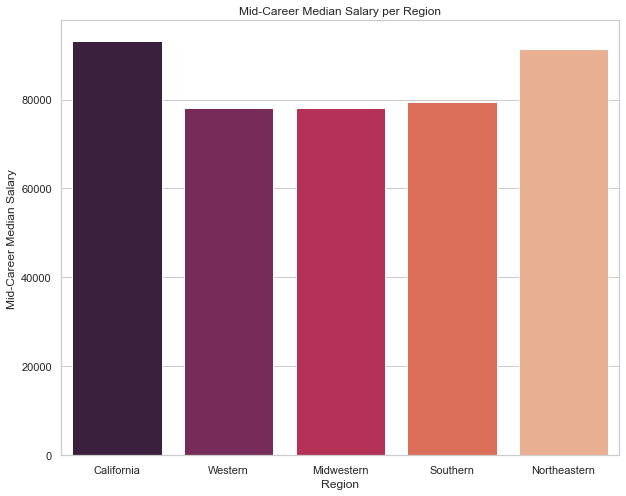

In [21]:
fig = plt.figure(figsize=(10,8))
sns.set_theme(style="whitegrid")
sns.barplot(x = "Region", y = "Mid-Career Median Salary",
            palette="rocket", data=df3, ci = None).set(title = "Mid-Career Median Salary per Region")

In [22]:
df2.sort_values(by = 'Percent change from Starting to Mid-Career Salary', ascending = True, inplace = True)
df2 = df2.reset_index()

df2.head(15)

,level_0,index,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,49,43,Physician Assistant,74300.0,91700.0,23.4,66400.0,75200.0,108000.0,124000.0
1,41,40,Nursing,54200.0,67000.0,23.6,47600.0,56400.0,80900.0,98300.0
2,21,41,Nutrition,39900.0,55300.0,38.6,33900.0,44500.0,70500.0,99200.0
3,10,32,Interior Design,36100.0,53200.0,47.4,35700.0,42600.0,72500.0,107000.0
4,2,18,Education,34900.0,52000.0,49.0,29300.0,37900.0,73400.0,102000.0
5,13,29,Hospitality & Tourism,37800.0,57500.0,52.1,35500.0,43600.0,81900.0,124000.0
6,35,31,Information Technology (IT),49100.0,74800.0,52.3,44500.0,56700.0,96700.0,129000.0
7,1,47,Religion,34100.0,52000.0,52.5,29700.0,36500.0,70900.0,96400.0
8,9,39,Music,35900.0,55000.0,53.2,26700.0,40200.0,88000.0,134000.0
9,18,27,Health Care Administration,38800.0,60600.0,56.2,34600.0,45600.0,78800.0,101000.0


Text(0.5, 1.0, 'Percent Change of Salaries for Different Majors')

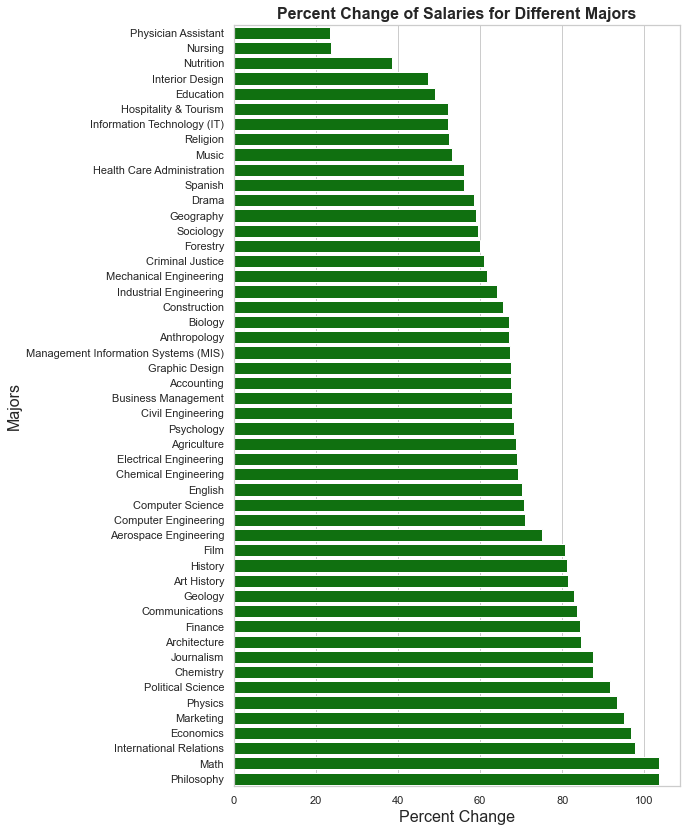

In [23]:
## Plot to portray the percent change for each major 
fig = plt.figure(figsize=(8,14))

sns.set(style="whitegrid", color_codes=True)
sns.barplot(x='Percent change from Starting to Mid-Career Salary', y='Undergraduate Major', data = df2, color = 'green')
plt.xlabel('Percent Change',fontsize=16);
plt.ylabel('Majors', fontsize=16);
plt.title('Percent Change of Salaries for Different Majors', fontsize=16, weight = 'bold')

Text(0.5, 1.0, 'Starting Median Salary vs. Mid-Career')

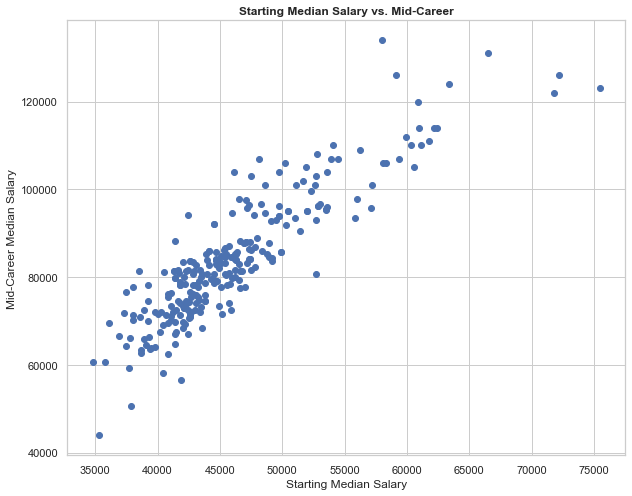

In [24]:
## Scatter plot where Starting Median Salary is taken in as the independent variable and Mid-Career Median Salary is the dependent.
fig = plt.figure(figsize=(10,8))

x = df['Starting Median Salary']
y = df['Mid-Career Median Salary']

plt.scatter(x,y)
plt.xlabel("Starting Median Salary")
plt.ylabel("Mid-Career Median Salary")
plt.title('Starting Median Salary vs. Mid-Career',weight = 'bold')

Text(0.5, 1.0, 'Starting Median Salary vs. Mid-Career 25th Percentile')

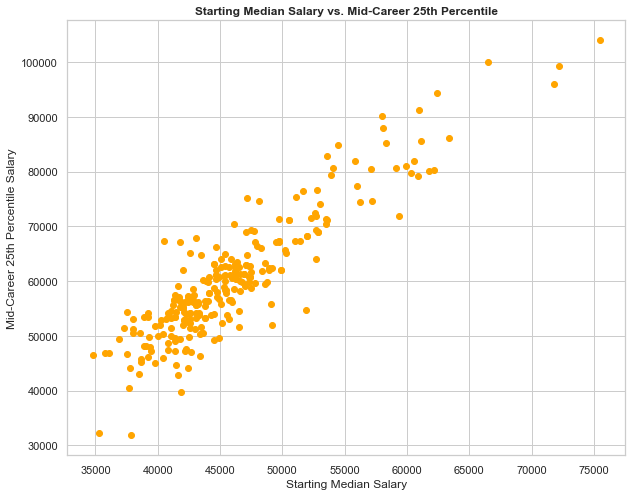

In [25]:
## Scatter plot of Starting Median Salary and Mid-Career 25th percentile
x = df['Starting Median Salary']
y = df['Mid-Career 25th Percentile Salary']

fig = plt.figure(figsize=(10,8))

plt.scatter(x,y, color = 'orange')
plt.xlabel("Starting Median Salary")
plt.ylabel("Mid-Career 25th Percentile Salary")
plt.title('Starting Median Salary vs. Mid-Career 25th Percentile', weight = 'bold')


Text(0.5, 1.0, 'Starting Median Salary vs. Mid-Career 75th Percentile')

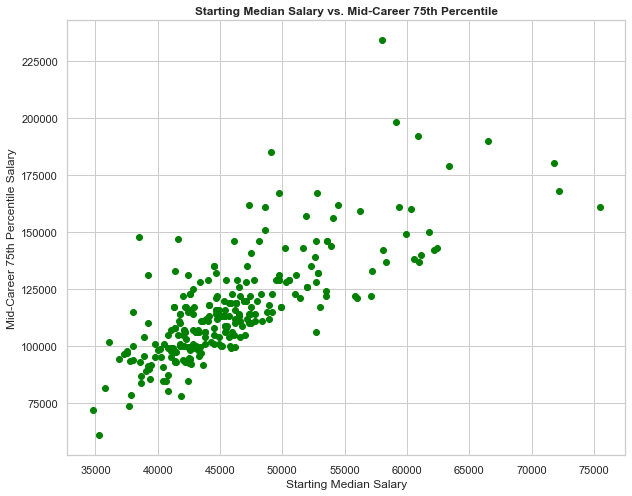

In [26]:
## Scatter plot of Starting Median Salary and Mid-Career 75th percentile
x = df['Starting Median Salary']
y = df['Mid-Career 75th Percentile Salary']

fig = plt.figure(figsize=(10,8))

plt.scatter(x,y, color = 'green')
plt.xlabel("Starting Median Salary")
plt.ylabel("Mid-Career 75th Percentile Salary")
plt.title('Starting Median Salary vs. Mid-Career 75th Percentile', weight = 'bold')

Y-Intercept = 50170.06
X-Coefficients=  [56741.41025207]
MSE = 36691859.80
R^2 = 0.80


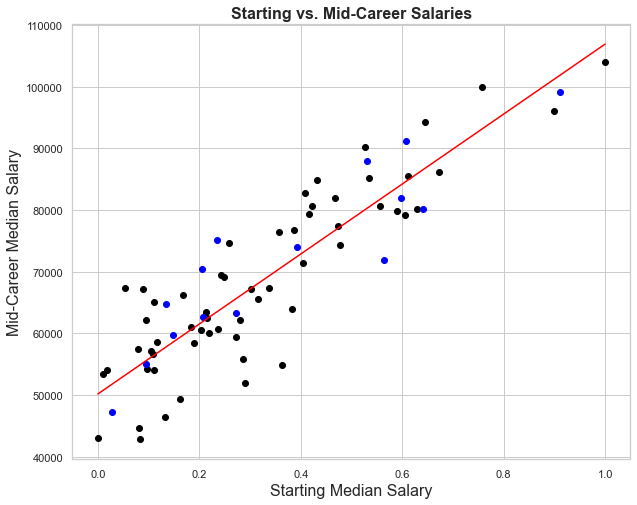

In [27]:
## Machine Learning Regression
## Going to take a subset of the data, only focusing on engineering, liberal arts, and ivy league schools
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

subsetdf = df[df['School Type'].isin(['Engineering', 'Ivy League','Liberal Arts']) ]
subsetdf

fig = plt.figure(figsize=(10,8))

##setting which x and y from the plots I want to look at 
x = subsetdf['Starting Median Salary']
y = subsetdf['Mid-Career 25th Percentile Salary']

x = x.values.reshape(-1,1)

scaler = MinMaxScaler()
x = scaler.fit_transform(x)

#setting model to use
model = sklearn.linear_model.LinearRegression()

##gathering test and training data
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    x, y, test_size=0.2, random_state=42)


model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print("Y-Intercept = %.2f" % model.intercept_)
print("X-Coefficients= ", model.coef_)

print('MSE = %.2f' % mean_squared_error(y_test, y_pred))
print('R^2 = %.2f' % r2_score(y_test, y_pred))


plt.scatter(x_train,y_train,color='black')
plt.scatter(x_test,y_test,color='blue')

## Creating the Regression Model
x_model_vals = np.linspace(0.0, 1.0, 37).reshape(-1,1)
y_model1_vals = model.predict(x_model_vals)

plt.plot(x_model_vals,y_model1_vals,'red')
plt.xlabel("Starting Median Salary", fontsize = 16)
plt.ylabel("Mid-Career Median Salary", fontsize = 16)
plt.title("Starting vs. Mid-Career Salaries", fontsize = 16, weight = 'bold')

y_pred = model.predict(x_test)

## Analysis

Taking a look at the first couple graphs in the exploratory data analysis portion, they had portrayed the starting salaries dependent on the different majors offered as an undergrad. The first one in particular only represented the median starting salaries, and from it, it was concluded that the physician assistant major had the best starting salary out of all the majors, earning about 74,300 dollars. The lowest out of all the majors was the spanish major, only making around 34,000 dollars. Majors in the engineering fields did well as expected, as those are most of the time very lucrative jobs. These engineering fields earned from around 57 thousand dollars all the way up to 63 thousand dollars. It is also important to note that majors in the business fields and majors that involved computer systems did well as well, earning at least 50 thousand at a starting salary. What is important to note is the following graph which also included the mid-career median salaries. This graphic may be more important to analyze as it will give insight to fields that are better paying as the person gains experience. It is no surpise that the engineering majors had a good increase from around 60 thousand dollars in the beginning to earning at least 90 thousand in their mid career. People with economics and physics majors also took a big jump as they make around double their starting salary. Looking at the percent change barplot a few graphs later, it can be seen that philosophy and math had over a 100% increase from their starting salary to the mid-career, and physics and economics majors had over 90%. It is also surprising that the physicians assistant major, that was the highest starting salary, did not have much of an increase at only 23% making 90 thousand. Majors like spanish, religion, education, etc., had increases, but are still majors that are not really lucrative. So for those that are looking for good paying jobs, should so far look into the engineering fields and also fields that involve computer systems. It is also interesting to see that in the 90th percentile, an economics major is making over 200 thousand, which goes to show that with enough effort the economics degree will pay off. <br> <br> 
Now taking at the salaries per region, the bar plots are created to illustrate the different regions addressed, which include California, Western, Mid-Western, Southern and North-Eastern regions. Out of these 4 regions, California and the Northeastern regions have the better starting salaries out of all the job fields. The average starting salaries in these regions are just above 50 thousand in California and just below 50 thousand for the Northeastern region. When it comes to the mid career salaries, this still holds true as the average salary in California and the northeastern region are around 90 thousand. <br><br> 
Lastly with the multiple final scatter plots, they were used to show the relation with starting salary and mid career salary. As expected, there is a positive correlation all around as, it should be known that as a person gains experience, their salary goes up. However looking at the linear regresion model that only includes engineering, ivy league, and liberal arts schools, we can predict that there is an increase in mid career salaries by 56,741 dollars for the increase of starting salaries. This basically means that higher starting salaries, which are usually found from schools in the engineering and ivy league types are more likely to see a higher mid- career salary.

## Conclusion

Returning to the big question of "Is college worth it?", it can be concluded that there really is no one right answer. It really depends on the career path that one chooses. However, if that career path involves jobs in the business, economics, engineering, and the other computer system field, the answer then shift more towards that it is definitely worth it. Jobs in those respective fields all require more knowledge that someone just out of high school cannot simply have. The reason there is such a high ceiling for those job is because of the intensive knowledge that one must gain and not just from experience. The field of business, economics, and engineering are all advancing as technology advances, so it is crucial for those that want to pursue those jobs to attend college no matter the costs. But when you look at careers in more liberal arts areas, like the spanish and religion majors, there is not much money there. So, it can be persuading that college may not be the route for them. If money is not the issue and one just has a passion for those fields, then by all means, go for it.